C:\Users\saira\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\saira\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\saira\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Text(0.5,1,'LDA vs PDA vs Random Forest Classifier')

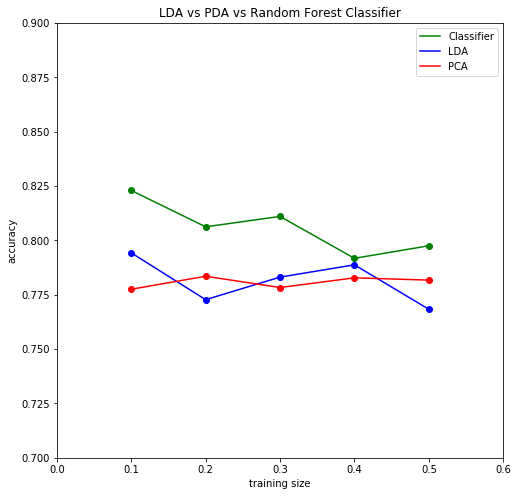

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('abalone_data.txt')



def catger(rr):
    if 1 <= rr <=8  : return '1'
    elif 9 <= rr <=16: return '2'
    elif 17 <= rr <=24: return '3'
    elif 25 <= rr <=29: return '4'   
    else: return 'None'
    
df['Rings'] = df['Rings'].map(catger)

X =df.iloc[:,0:7]
y =df.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
X.iloc[:,0] = labelencoder_X.fit_transform(X.iloc[:,0])

accl=[]
accp =[]
acc =[]
for i in [0.10,0.20,0.30,0.40,0.50]:

    X_train ,X_test,y_train,y_test = train_test_split(X,y, test_size=i,random_state=0) 
    
    classifier = RandomForestClassifier(n_estimators = 200, criterion ='entropy', random_state = 0)
    classifierp = RandomForestClassifier(n_estimators = 200, criterion ='entropy', random_state = 0)
    classifierl = RandomForestClassifier(n_estimators = 200, criterion ='entropy', random_state = 0)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #Computing PCA projection
    pca = PCA(n_components=3)
    X_trainp= pca.fit(X_train).transform(X_train)
    X_testp = pca.transform(X_test)
    classifierp.fit(X_trainp,y_train)
    p_pred = classifierp.predict(X_testp)
    # Accuracy of PCA
    acc1 = accuracy_score(y_test, p_pred)
    accp.append(acc1)
    
    #Computing Linear Discriminant Analysis projection
    lda = LinearDiscriminantAnalysis(n_components=3)
    X_trainl = lda.fit(X_train, y_train).transform(X_train)
    X_testl = lda.transform(X_test)
    classifierl.fit(X_trainl,y_train)
    l_pred = classifierl.predict(X_testl)
    #Accuracy of LDA
    acc2 = accuracy_score(y_test, l_pred)
    accl.append(acc2)
    
    
    #Computing Classifier
    classifier.fit(X_train,y_train)
    y_pred = pred = classifier.predict(X_test)
    #Accuracy of Classifier
    acc3 = accuracy_score(y_test, y_pred)
    acc.append(acc3)
    

    
trainsize = [0.10,0.20,0.30,0.40,0.50]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trainsize,acc,color='green')
plt.plot(trainsize,acc,color='green',label ='Classifier')
plt.scatter(trainsize,accl,color='blue')
plt.plot(trainsize,accl,color='blue',label='LDA')
plt.scatter(trainsize,accp,color='red')
plt.plot(trainsize,accp,color='red',label = 'PCA')
plt.legend()
plt.axis([0,0.6,0.70,0.90])
plt.xlabel('training size')
plt.ylabel('accuracy')
plt.title('LDA vs PDA vs Random Forest Classifier')


In [20]:
print("Random Forest Classifier Accuracy\n", acc)
print("PCA Accuracy\n", accp)
print("LDA Accuracy\n", accl)

Random Forest Classifier Accuracy
 [0.8229665071770335, 0.80622009569378, 0.8110047846889952, 0.7917414721723519, 0.7975107707036859]
PCA Accuracy
 [0.777511961722488, 0.7834928229665071, 0.7783094098883573, 0.7827648114901257, 0.7817137386309239]
LDA Accuracy
 [0.7942583732057417, 0.7727272727272727, 0.7830940988835726, 0.7887492519449432, 0.768310196266156]
